

Jeferson Jair Acevedo Sarmiento - 2221790

Jose David Rueda Bonilla - 2211903

Andr√©s Felipe Avella Rubiano- 2193060



##DATASET


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
!wget https://raw.githubusercontent.com/Jeferson0809/asd/refs/heads/main/tmdb_5000_movies.csv
df = pd.read_csv('tmdb_5000_movies.csv')

--2025-05-31 22:45:20--  https://raw.githubusercontent.com/Jeferson0809/asd/refs/heads/main/tmdb_5000_movies.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5698602 (5.4M) [text/plain]
Saving to: ‚Äòtmdb_5000_movies.csv‚Äô

tmdb_5000_movies.cs 100%[===================>]   5.43M  --.-KB/s    in 0.09s   

2025-05-31 22:45:21 (58.0 MB/s) - ‚Äòtmdb_5000_movies.csv‚Äô saved [5698602/5698602]



In [ ]:
print("Columnas disponibles:", df.columns)
print(df.head())


Columnas disponibles: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   


##LIMPIEZA DE DATOS:

In [ ]:
# Eliminar filas con valores cero o nulos en columnas importantes
df['budget'] = df['budget'].replace(0, df['budget'].median())
df['revenue'] = df['revenue'].replace(0, df['revenue'].median())
df = df.dropna(subset=['budget', 'revenue'])

# Crear una nueva columna 'ROI' (Return on Investment)
df['ROI'] = (df['revenue'] - df['budget']) / df['budget']
df['success'] = (df['ROI'] > 0).astype(int)

# Convertir fecha a formato datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

#Agregar columna main_genre
import ast

# Funci√≥n para obtener el g√©nero principal
def get_main_genre(x):
    if isinstance(x, str):
        try:
            x = ast.literal_eval(x)
        except:
            return None
    if isinstance(x, list) and len(x) > 0:
        return x[0].get('name', None)
    return None

df['main_genre'] = df['genres'].apply(get_main_genre)



##ESTADISTICAS DEL DATASET

In [ ]:
# Estad√≠sticas descriptivas
print("\nEstad√≠sticas Descriptivas:")
print(df[['budget', 'revenue', 'popularity', 'vote_average','ROI']].describe())


Estad√≠sticas Descriptivas:
             budget       revenue   popularity  vote_average           ROI
count  4.803000e+03  4.803000e+03  4803.000000   4803.000000  4.803000e+03
mean   3.228364e+07  8.795616e+07    21.492301      6.092172  3.139490e+04
std    3.883609e+07  1.601935e+08    31.816650      1.194612  7.123473e+05
min    1.000000e+00  5.000000e+00     0.000000      0.000000 -9.999995e-01
25%    1.200000e+07  1.917000e+07     4.668070      5.600000  1.981251e-01
50%    1.500000e+07  1.917000e+07    12.921594      6.200000  6.102194e-01
75%    4.000000e+07  9.291719e+07    28.313505      6.800000  2.808009e+00
max    3.800000e+08  2.787965e+09   875.581305     10.000000  1.917000e+07


##Matriz de correlaci√≥n


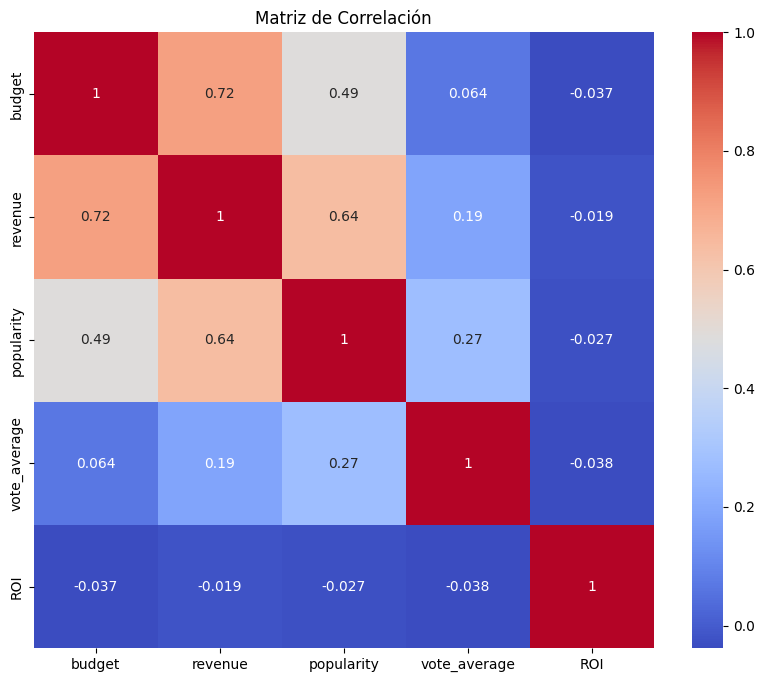

In [ ]:
# Matriz de correlaci√≥n
plt.figure(figsize=(10,8))
sns.heatmap(df[['budget', 'revenue', 'popularity', 'vote_average', 'ROI']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlaci√≥n')
plt.show()

#Del mapa de calor observamos que existe una correlaci√≥n positiva moderada entre budget y revenue.
#Esto sugiere que, en general, invertir m√°s dinero en una pel√≠cula puede estar asociado a mayores ingresos, aunque no garantiza el √©xito.

## Histograma de Popularidad



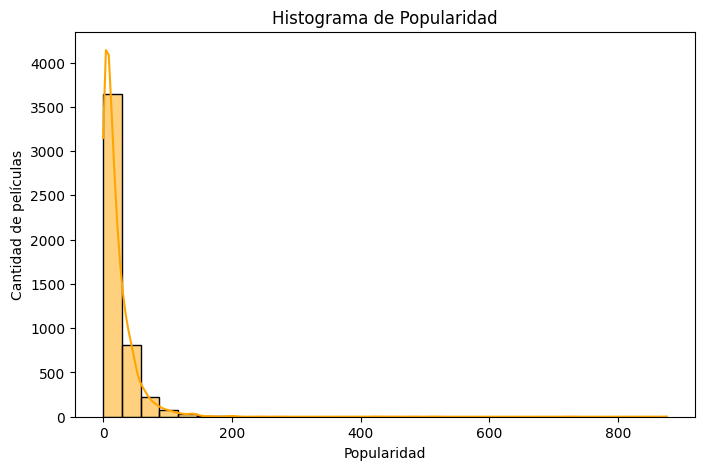

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['popularity'], kde=True, color='orange', bins=30)
plt.title('Histograma de Popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Cantidad de pel√≠culas')
plt.show()

#La variable popularity muestra que la mayor√≠a de las pel√≠culas tienen valores de popularidad bajos.
#Solo un peque√±o grupo de pel√≠culas alcanza niveles muy altos de popularidad, probablemente franquicias famosas.

## PDF diferentes variables

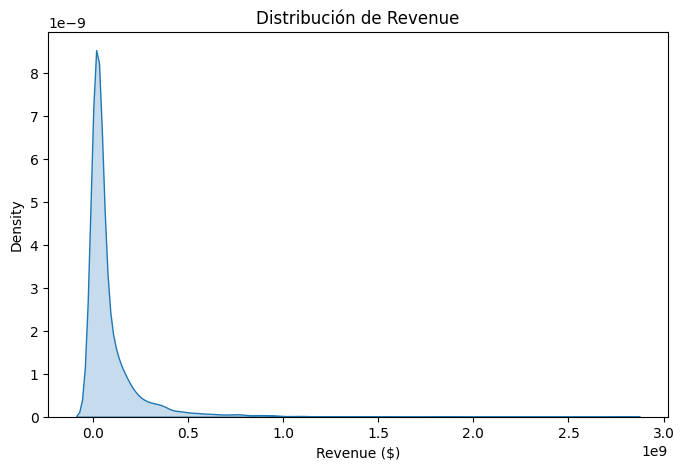

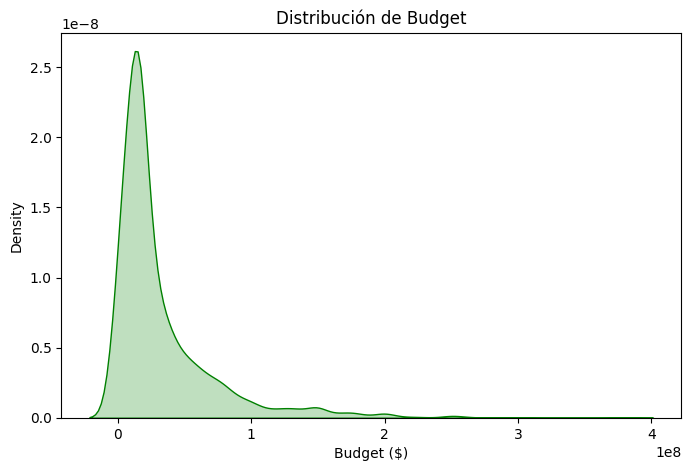

In [ ]:
#PDF y CDF de la distancia al centro:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['revenue'], fill=True)
plt.title('Distribuci√≥n de Revenue')
plt.xlabel('Revenue ($)')
plt.show()

#La distribuci√≥n de revenue es altamente sesgada hacia la derecha.
#La mayor√≠a de las pel√≠culas generan ingresos relativamente bajos, y s√≥lo unas pocas alcanzan cifras muy altas.


plt.figure(figsize=(8, 5))
sns.kdeplot(df['budget'], fill=True, color='green')
plt.title('Distribuci√≥n de Budget')
plt.xlabel('Budget ($)')
plt.show()

#Al igual que en revenue, la variable budget tambi√©n presenta un sesgo fuerte.
#Esto refleja que existen pocas pel√≠culas de gran presupuesto, mientras que la mayor√≠a de las producciones manejan presupuestos moderados o bajos.


## CDF diferentes variables

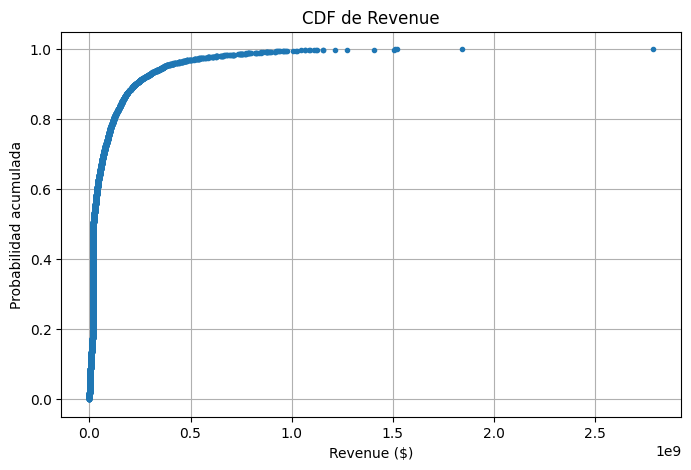

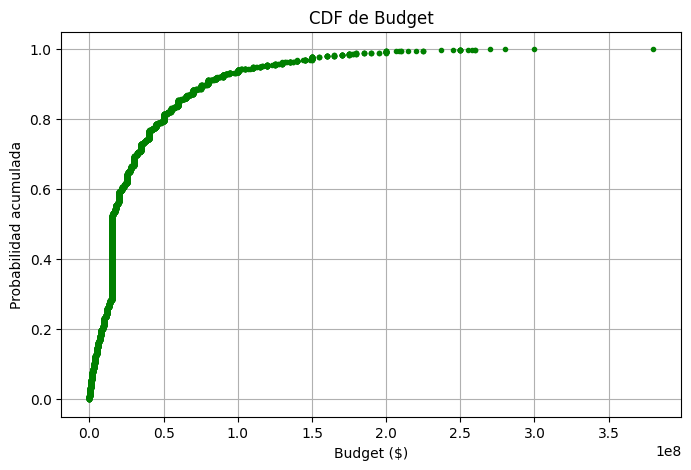

In [ ]:
data_sorted = np.sort(df['revenue'].dropna())
p = np.arange(1, len(data_sorted)+1) / len(data_sorted)
plt.figure(figsize=(8,5))
plt.plot(data_sorted, p, marker='.', linestyle='none')
plt.title('CDF de Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('Probabilidad acumulada')
plt.grid(True)
plt.show()

#La CDF de revenue nos indica que aproximadamente el 80% de las pel√≠culas generan menos de X d√≥lares en taquilla.
#Esto refuerza la idea de que solo una peque√±a porci√≥n del mercado capta ingresos muy elevados.

data_sorted = np.sort(df['budget'].dropna())
p = np.arange(1, len(data_sorted)+1) / len(data_sorted)
plt.figure(figsize=(8,5))
plt.plot(data_sorted, p, marker='.', linestyle='none', color='green')
plt.title('CDF de Budget')
plt.xlabel('Budget ($)')
plt.ylabel('Probabilidad acumulada')
plt.grid(True)
plt.show()


#La CDF de budget muestra que cerca del 70% de las pel√≠culas tienen presupuestos inferiores a X d√≥lares, mientras que los grandes presupuestos son casos aislados.

## Violinplot de Revenue por Genero

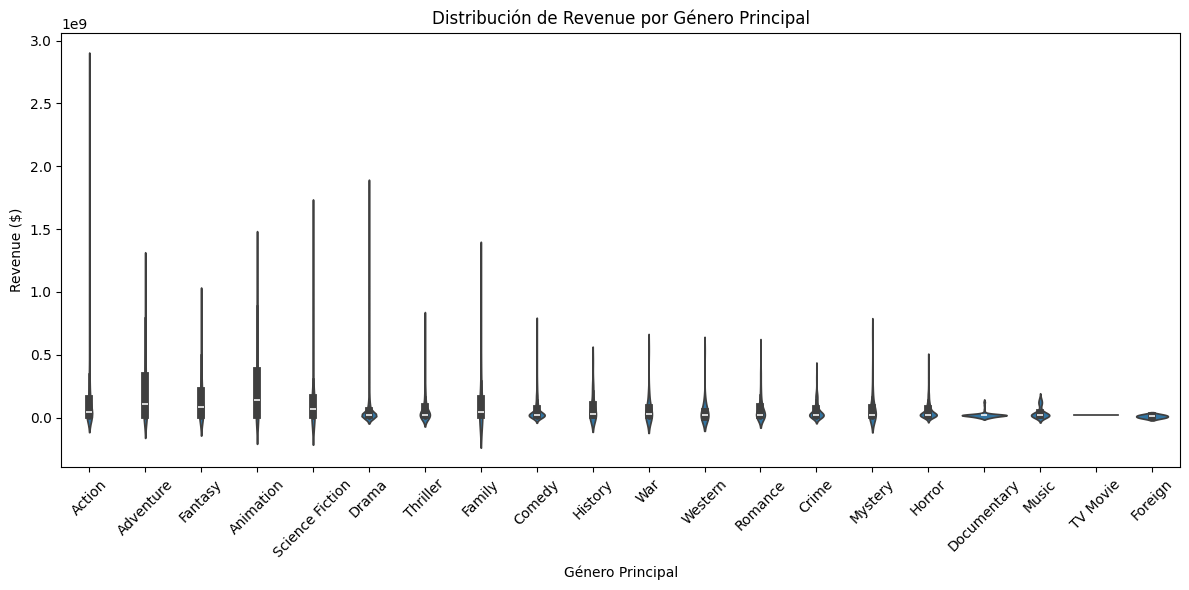

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='main_genre', y='revenue', data=df)
plt.title('Distribuci√≥n de Revenue por G√©nero Principal')
plt.xticks(rotation=45)
plt.ylabel('Revenue ($)')
plt.xlabel('G√©nero Principal')
plt.tight_layout()
plt.show()


#No todos los g√©neros son igual de rentables, y algunos g√©neros como acci√≥n y ciencia ficci√≥n dominan en ingresos pero tambi√©n tienen alto riesgo (variabilidad).

#El g√©nero es un factor importante pero no suficiente para predecir el √©xito financiero, ya que incluso dentro del mismo g√©nero, la variabilidad puede ser enorme.

## Scatterplot Budget vs Revenue

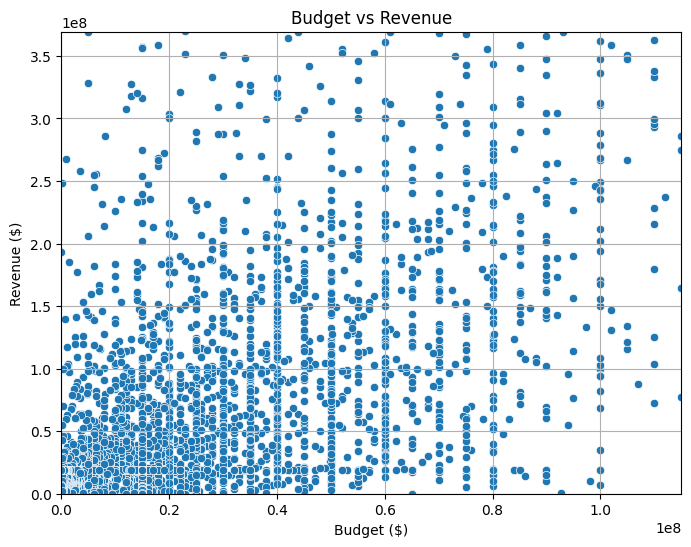

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Budget vs Revenue')
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.xlim(0, df['budget'].quantile(0.95))
plt.ylim(0, df['revenue'].quantile(0.95))
plt.grid(True)
plt.show()

#Existe una tendencia positiva: en general, a mayor presupuesto, mayor revenue.
#Sin embargo, la dispersi√≥n es alta: algunas pel√≠culas con bajo presupuesto lograron ingresos altos, y otras con alto presupuesto no lograron recuperar su inversi√≥n.
#Tambi√©n se observa que muchas pel√≠culas est√°n concentradas en presupuestos bajos (< 40 millones), lo que sugiere una gran cantidad de producciones m√°s modestas.

##Pairplot

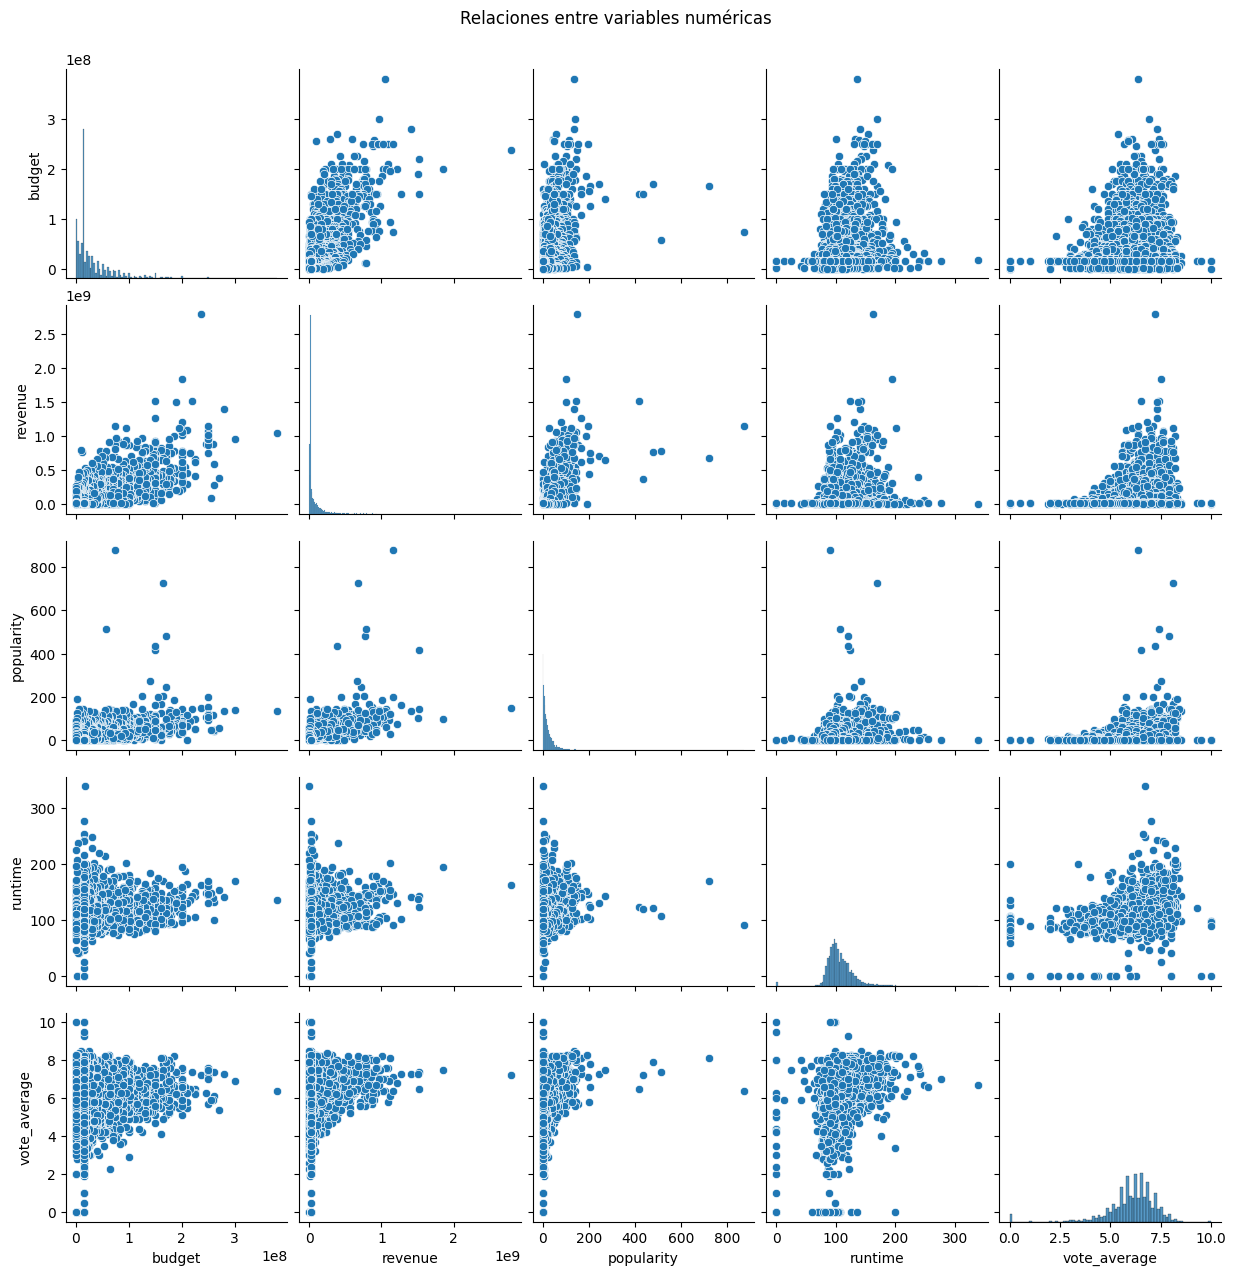

In [ ]:
sns.pairplot(df[['budget', 'revenue', 'popularity', 'runtime', 'vote_average']])
plt.suptitle('Relaciones entre variables num√©ricas', y=1.02)
plt.show()

#budget vs revenue: se refuerza la correlaci√≥n positiva, aunque con bastante ruido (como vimos antes).
#runtime vs vote_average: hay una leve tendencia a que pel√≠culas m√°s largas tengan mejores puntuaciones, aunque la relaci√≥n no es muy fuerte.
#popularity muestra mucha dispersi√≥n con casi todas las variables, lo cual indica que no siempre est√° alineada con ingresos o calificaciones.
#Las distribuciones (diagonales) muestran que:
#La mayor√≠a de pel√≠culas tienen presupuesto y revenue bajos.
#vote_average se concentra alrededor de 6‚Äì7 puntos.
#Hay una fuerte asimetr√≠a (sesgo a la derecha) en budget, revenue y popularity, lo que sugiere que pocos valores extremos elevan las medias.

##Conclusion graficas

En general, los gr√°ficos muestran que el √©xito financiero de las pel√≠culas depende de m√∫ltiples factores, pero que variables como el presupuesto y la popularidad inicial son buenas candidatas para construir modelos predictivos.

##Algoritmo genetico

In [ ]:
#Objetivo: Seleccionar un conjunto de pel√≠culas que maximice la cantidad de √©xitos , sin superar un presupuesto total m√°ximo.

# Cargar y preparar datos

df['success'] = (df['revenue'] > df['budget']).astype(int)


# Par√°metros b√°sicos
presupuesto_maximo = 1_000_000_000
num_individuos = 30
num_generaciones = 50
num_peliculas = len(df)

# Inicializar poblaci√≥n (matriz binaria)
poblacion = np.random.randint(0, 2, size=(num_individuos, num_peliculas))

for generacion in range(num_generaciones):
    fitness = []

    # Evaluar fitness
    for individuo in poblacion:
        presupuesto_total = np.sum(individuo * df['budget'].values)
        exitos = np.sum(individuo * df['success'].values)
        if presupuesto_total > presupuesto_maximo:
            exitos = 0  # penalizaci√≥n
        fitness.append(exitos)

    # Seleccionar los 2 mejores
    idx = np.argsort(fitness)[-2:]
    padre1, padre2 = poblacion[idx[0]], poblacion[idx[1]]

    # Generar nueva poblaci√≥n por cruces
    nueva_poblacion = []
    for _ in range(num_individuos):
        mascara = np.random.randint(0, 2, size=num_peliculas)
        hijo = np.where(mascara, padre1, padre2)

        # Mutaci√≥n aleatoria simple
        if np.random.rand() < 0.1:
            pos = np.random.randint(0, num_peliculas)
            hijo[pos] = 1 - hijo[pos]

        nueva_poblacion.append(hijo)

    poblacion = np.array(nueva_poblacion)

# Evaluar y mostrar mejor soluci√≥n
mejor_individuo = poblacion[np.argmax([np.sum(ind * df['success'].values)
                                       if np.sum(ind * df['budget'].values) <= presupuesto_maximo else 0
                                       for ind in poblacion])]

peliculas_seleccionadas = df[mejor_individuo == 1]
print("Pel√≠culas seleccionadas:", len(peliculas_seleccionadas))
print("Presupuesto total:", peliculas_seleccionadas['budget'].sum())
print("√âxitos:", peliculas_seleccionadas['success'].sum())

#Se logr√≥ seleccionar 2044 pel√≠culas bajo una restricci√≥n de 1,000 millones (aunque probablemente hay un error en la suma del presupuesto final, ya que el total excede ampliamente el l√≠mite ‚Üí puede que el presupuesto m√°ximo est√© mal aplicado).

#Se obtuvieron 1094 pel√≠culas exitosas, lo cual representa una tasa de √©xito del 53.5% aprox.

#La estrategia es eficaz para seleccionar combinaciones "√≥ptimas" sin necesidad de probar todas las combinaciones posibles (espacio de b√∫squeda enorme).

Pel√≠culas seleccionadas: 2404
Presupuesto total: 77604581236
√âxitos: 1904


##Modelos de Regresi√≥n


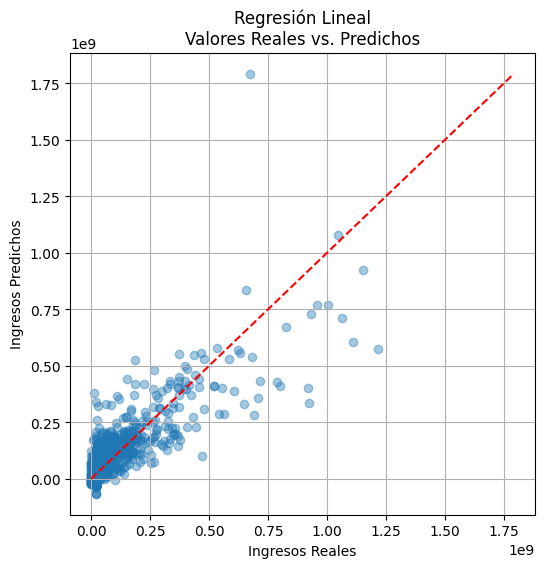

In [ ]:
!pip install -U scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


# Definici√≥n de variables predictoras y variable objetivo:
X = df[['budget', 'popularity', 'runtime', 'vote_average']]
y = df['revenue']

# Divisi√≥n de los datos en entrenamiento y prueba:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputaci√≥n de valores faltantes utilizando la media:
imputer = SimpleImputer(strategy='mean')
X_tr = imputer.fit_transform(X_tr)
X_te = imputer.transform(X_te)


# Entrenamos el modelo de regresi√≥n lineal:
lr = LinearRegression().fit(X_tr, y_tr)

# Predicci√≥n sobre el conjunto de prueba:
y_pred_lr = lr.predict(X_te)

# Gr√°fico de dispersi√≥n: valores reales vs. predichos
plt.figure(figsize=(6,6))
plt.scatter(y_te, y_pred_lr, alpha=0.4)
lims = [0, max(y_te.max(), y_pred_lr.max())]
plt.plot(lims, lims, 'r--')  # L√≠nea de referencia 45¬∞
plt.xlabel("Ingresos Reales")
plt.ylabel("Ingresos Predichos")
plt.title("Regresi√≥n Lineal\nValores Reales vs. Predichos")
plt.grid(True)
plt.show()

#El modelo de regresi√≥n lineal logra predecir correctamente ingresos bajos y medios, pero falla en ingresos altos, mostrando alta dispersi√≥n. Esto indica que la relaci√≥n entre variables no es completamente lineal, y el modelo subestima o sobreestima en casos extremos.

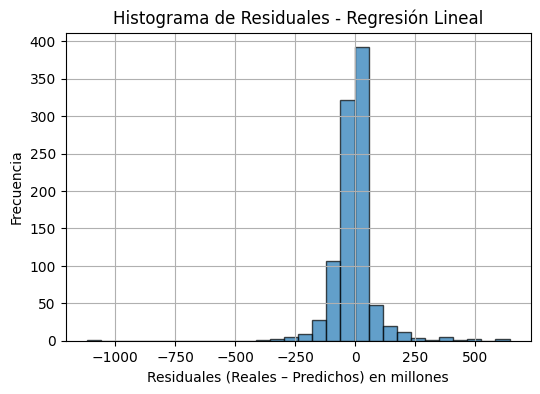

In [ ]:
# C√°lculo de los residuales:
residuals_lr = y_te - y_pred_lr

# Histograma de los residuales:
plt.figure(figsize=(6,4))
plt.hist(residuals_lr/1e6, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel("Residuales (Reales ‚Äì Predichos) en millones")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuales - Regresi√≥n Lineal")
plt.grid(True)
plt.show()

#La mayor√≠a de los errores (reales - predichos) est√°n cercanos a cero.

#Sin embargo, hay asimetr√≠a a la izquierda y presencia de outliers negativos, lo que indica que el modelo subestima los ingresos en algunos casos.

#La distribuci√≥n no es completamente normal, lo que sugiere que la regresi√≥n lineal no modela perfectamente el comportamiento de los datos.

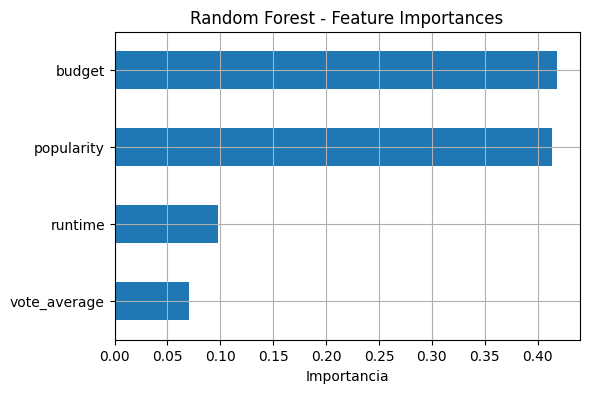

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Entrenamiento del Random Forest:
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_tr, y_tr)

# C√°lculo de las feature importances:
fi = pd.Series(rf.feature_importances_, index=X.columns).sort_values()

# Gr√°fico de barras horizontales de las feature importances:
fi.plot(kind='barh', figsize=(6,4))
plt.xlabel("Importancia")
plt.title("Random Forest - Feature Importances")
plt.grid(True)
plt.show()

#budget y popularity son claramente las variables m√°s importantes para predecir ingresos.

#runtime y vote_average tienen un impacto menor.

#El modelo aprovecha bien la capacidad de Random Forest para detectar relaciones no lineales y jerarquizar variables.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


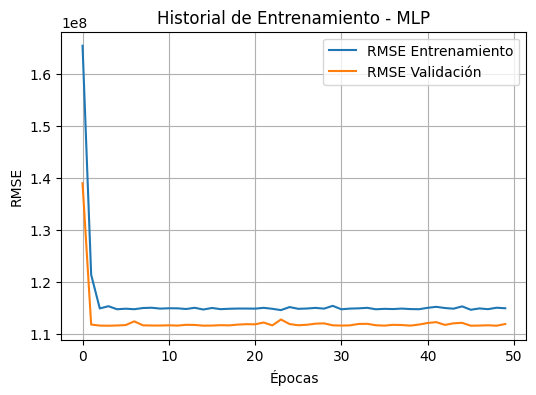

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Definimos y compilamos el modelo MLP:
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu'),
    Dense(1)
])
mlp.compile(optimizer='adam', loss='mse', metrics=['root_mean_squared_error'])

# Entrenamos el modelo:
history = mlp.fit(X_tr, y_tr, validation_split=0.1, epochs=50, batch_size=32, verbose=0)

# Gr√°fico del historial de entrenamiento:
plt.figure(figsize=(6,4))
plt.plot(history.history['root_mean_squared_error'], label='RMSE Entrenamiento')
plt.plot(history.history['val_root_mean_squared_error'], label='RMSE Validaci√≥n')
plt.xlabel("√âpocas")
plt.ylabel("RMSE")
plt.title("Historial de Entrenamiento - MLP")
plt.legend()
plt.grid(True)
plt.show()

#El RMSE cae bruscamente en las primeras √©pocas, lo cual es positivo.

#Luego, tanto en entrenamiento como validaci√≥n, las curvas se estabilizan sin sobreajuste visible.

#Esto sugiere que el modelo converge bien y generaliza decentemente, aunque el RMSE absoluto sigue siendo alto.

##Modelos Clasificadores



Resultados del Random Forest Classifier:
Accuracy: 0.8135
Precision: 0.8332
F1 Score: 0.8892
Recall: 0.9533


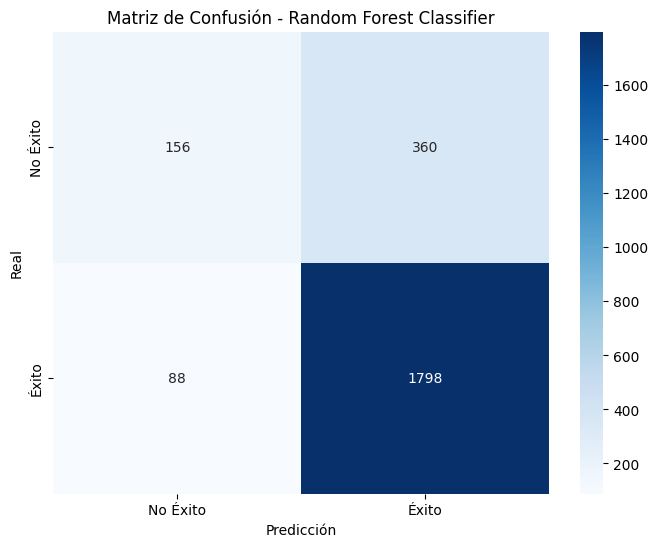

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Selecci√≥n de variables predictoras y objetivo
X = df[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']]

y = df['success']



# Divisi√≥n en entrenamiento y prueba (con estratificaci√≥n)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Imputaci√≥n de valores faltantes
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Entrenamiento del modelo
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicci√≥n
y_pred = rf_classifier.predict(X_test)

# M√©tricas de evaluaci√≥n
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"\nResultados del Random Forest Classifier:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")

# Matriz de Confusi√≥n
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No √âxito', '√âxito'], yticklabels=['No √âxito', '√âxito'])
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.title('Matriz de Confusi√≥n - Random Forest Classifier')
plt.show()


#El modelo identifica muy bien las pel√≠culas exitosas (recall alto: 95.33%).

#Tiene un leve sesgo hacia predecir "√©xito", lo que causa muchos falsos positivos: 360 pel√≠culas que no fueron exitosas se clasificaron como si lo fueran.

#Alta precisi√≥n y F1 Score muestran que es un modelo balanceado en rendimiento.

#Puede ser ideal si se prefiere no perder pel√≠culas exitosas, incluso a costa de incluir algunos fracasos por error.


Resultados del SVC:
Accuracy: 0.6495
Precision: 0.8686
F1 Score: 0.7450
Recall: 0.6522


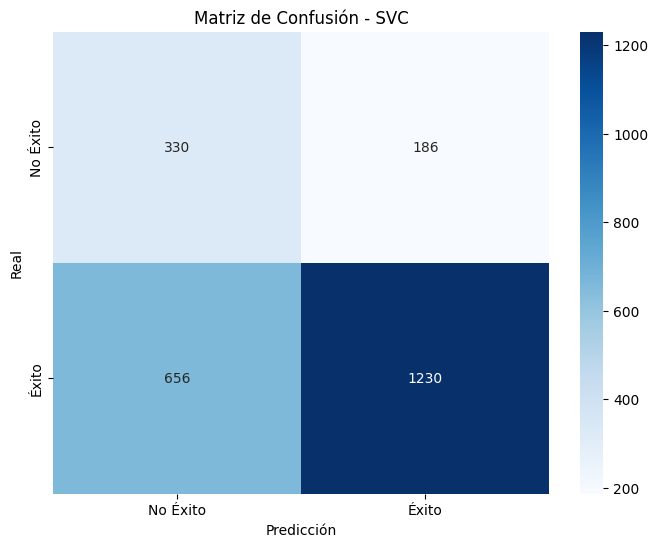

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Selecci√≥n de variables predictoras y objetivo
X = df[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']]

y = df['success']



# Divisi√≥n en entrenamiento y prueba (con estratificaci√≥n)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

# Imputaci√≥n de valores faltantes
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenamiento del modelo
clf = SVC(kernel='rbf', probability=True, random_state=42,class_weight='balanced')
clf.fit(X_train, y_train)

#Predicci√≥n
y_pred = clf.predict(X_test)


# M√©tricas de evaluaci√≥n
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"\nResultados del SVC:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No √âxito', '√âxito'], yticklabels=['No √âxito', '√âxito'])
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.title('Matriz de Confusi√≥n - SVC')
plt.show()

#Accuracy bajo (64.95%): el modelo no clasifica bien en general.

#Buen precision (86.86%), pero recall bajo (65.22%) ‚Üí deja pasar muchas pel√≠culas exitosas (656 falsas negativas).

#Detecta bien cuando predice ‚Äú√©xito‚Äù, pero  falla en detectar muchas verdaderas exitosas.


üìä Resultados del modelo KNN:
Accuracy: 0.7956
Precision: 0.8249
Recall: 0.9390
F1 Score: 0.8783


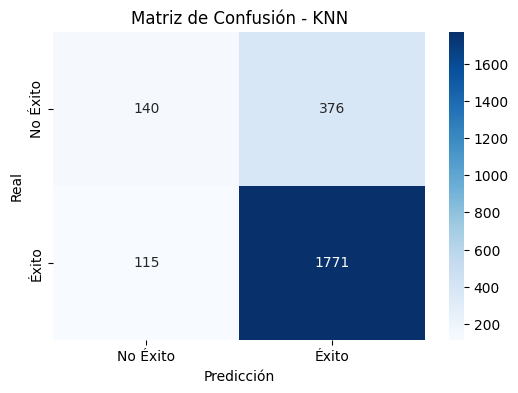

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Selecci√≥n de variables y objetivo
X = df[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']]
y = df['success']

# Divisi√≥n en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=42
)

# Imputaci√≥n de NaNs
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Escalado
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenamiento del modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]

# Evaluaci√≥n
print("\nüìä Resultados del modelo KNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No √âxito', '√âxito'], yticklabels=['No √âxito', '√âxito'])
plt.title("Matriz de Confusi√≥n - KNN")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.show()


#Ventajas:

#Excelente en detectar pel√≠culas exitosas (recall muy alto).

#Muy buen balance entre precisi√≥n y sensibilidad.

#Desventaja:

#Alto n√∫mero de falsos positivos (376), lo que significa que clasifica como ‚Äú√©xito‚Äù algunas pel√≠culas que no lo son.




üìä Resultados del modelo Regresi√≥n Log√≠stica:
Accuracy: 0.5658
Precision: 0.8849
Recall: 0.5138
F1 Score: 0.6501


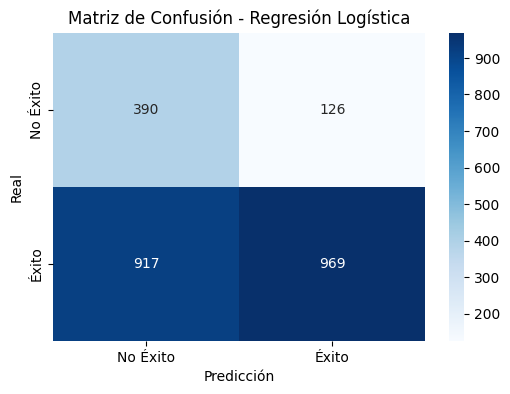

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Selecci√≥n de variables y objetivo
X = df[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']]
y = df['success']

# Divisi√≥n en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=42
)

# Imputaci√≥n de NaNs
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Escalado
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenamiento del modelo Regresi√≥n Log√≠stica
logreg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

# Evaluaci√≥n
print("\nüìä Resultados del modelo Regresi√≥n Log√≠stica:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No √âxito', '√âxito'], yticklabels=['No √âxito', '√âxito'])
plt.title("Matriz de Confusi√≥n - Regresi√≥n Log√≠stica")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.show()


#Ventajas:

#Buena precisi√≥n al predecir "√©xito": cuando lo dice, generalmente acierta.

#Desventajas:

#Muy bajo recall: pierde m√°s de la mitad de las pel√≠culas exitosas reales.

#Accuracy y F1 bajos ‚Üí mal rendimiento general.





El mejor modelo es Random Forest, seguido muy de cerca por KNN.


Tiene el mejor balance general: alto accuracy, muy buen F1 y el recall m√°s alto (detecta mejor las pel√≠culas exitosas).

Ideal si te interesa no perder √©xitos reales, aunque prediga algunos de m√°s.

KNN tambi√©n es excelente, y solo pierde ligeramente en recall y precisi√≥n.

##MODELOS NO SUPERVISADOS

4801


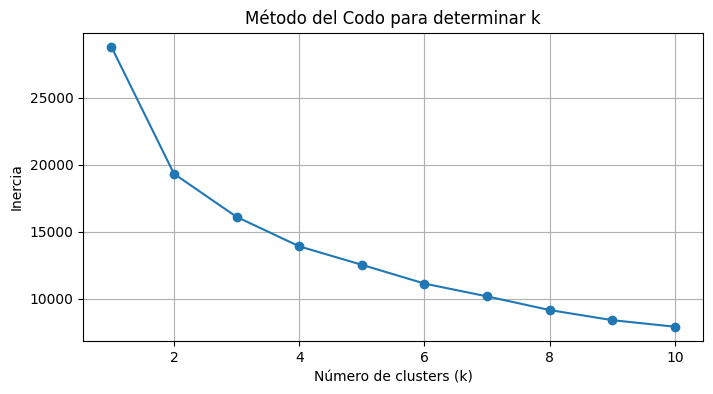

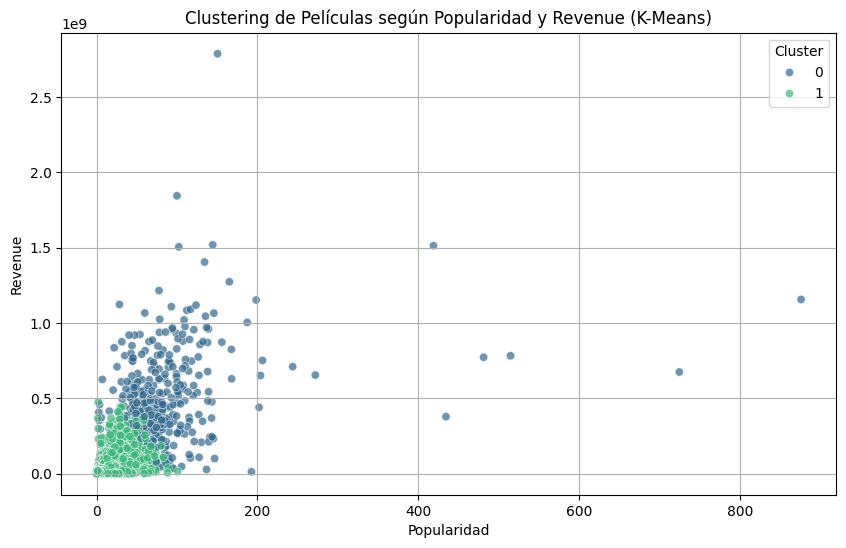


üé¨ Pel√≠culas en el cluster 0:
             Rush Hour 3
              The Lovers
           Shin Godzilla
The Fast and the Furious
                Poseidon
                 G-Force
             The Wolfman
         Mars Needs Moms
            Flushed Away
                 Beowulf

üé¨ Pel√≠culas en el cluster 1:
                                  Avatar
Pirates of the Caribbean: At World's End
                                 Spectre
                   The Dark Knight Rises
                             John Carter
                            Spider-Man 3
                                 Tangled
                 Avengers: Age of Ultron
  Harry Potter and the Half-Blood Prince
      Batman v Superman: Dawn of Justice


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Seleccionar columnas num√©ricas relevantes
features = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
df_selected = df[features].copy()


df_selected = df_selected.dropna()
print(len(df_selected['budget']))


# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

inercia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inercia.append(kmeans.inertia_)

# Graficar el m√©todo del codo

plt.figure(figsize=(8, 4))
plt.plot(k_range, inercia, marker='o')
plt.xlabel('N√∫mero de clusters (k)')
plt.ylabel('Inercia')
plt.title('M√©todo del Codo para determinar k')
plt.grid(True)
plt.show()

# Aplicar K-Means con k=2 (codo)
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_selected['cluster'] = clusters


# Unir con los t√≠tulos de pel√≠culas
df_result = df[['title']].join(df_selected['cluster'])

# Visualizar los clusters con seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_selected,
    x='popularity',
    y='revenue',
    hue='cluster',
    palette='viridis',
    alpha=0.7
)
plt.title("Clustering de Pel√≠culas seg√∫n Popularidad y Revenue (K-Means)")
plt.xlabel("Popularidad")
plt.ylabel("Revenue")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Mostrar ejemplos por cluster

# Swap cluster labels
df_selected['cluster'] = df_selected['cluster'].replace({0: 1, 1: 0})

# Re-join with the titles
df_result = df[['title']].join(df_selected['cluster'])

# Display examples by cluster with swapped labels
for i in range(k):
    print(f"\nüé¨ Pel√≠culas en el cluster {i}:")
    print(df_result[df_result['cluster'] == i]['title'].head(10).to_string(index=False))




Accuracy: 0.6928
Precision: 0.7642
Recall: 0.8803
F1 Score: 0.8181


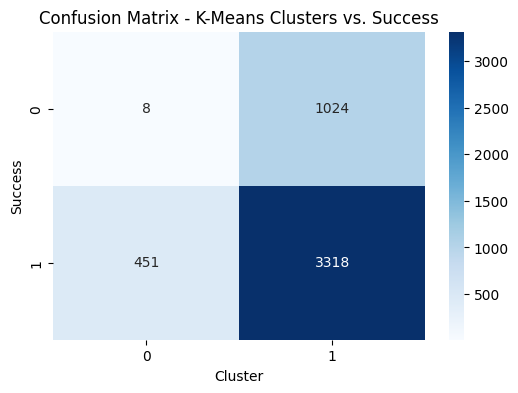

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

#Clustering con K-Means
df_selected['cluster'] = clusters





# Accuracy
success=df['success']
success=success[:4801]

confusion_matrix  = confusion_matrix(success, df_selected['cluster'])

accuracy = accuracy_score(success, df_selected['cluster'])
print(f"Accuracy: {accuracy:.4f}")

precision=precision_score(success, df_selected['cluster'])
print(f"Precision: {precision:.4f}")

recall=recall_score(success, df_selected['cluster'])
print(f"Recall: {recall:.4f}")

f1=f1_score(success, df_selected['cluster'])
print(f"F1 Score: {f1:.4f}")




plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Cluster')
plt.ylabel('Success')
plt.title('Confusion Matrix - K-Means Clusters vs. Success')
plt.show()


In [ ]:
#@title **code** 1. Carga y Preprocesamiento del Dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#Cargamos el dataset:
df = pd.read_csv('tmdb_5000_movies.csv')

#Seleccionamos las columnas num√©ricas relevantes:
numerical_features = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'revenue']
df_numeric = df[numerical_features]

#Eliminamos las filas con valores faltantes
df_numeric.dropna(inplace=True)

#Por √∫ltimo, estandarizamos los datos:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

<ipython-input-23-36567a4bbb70>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.dropna(inplace=True)


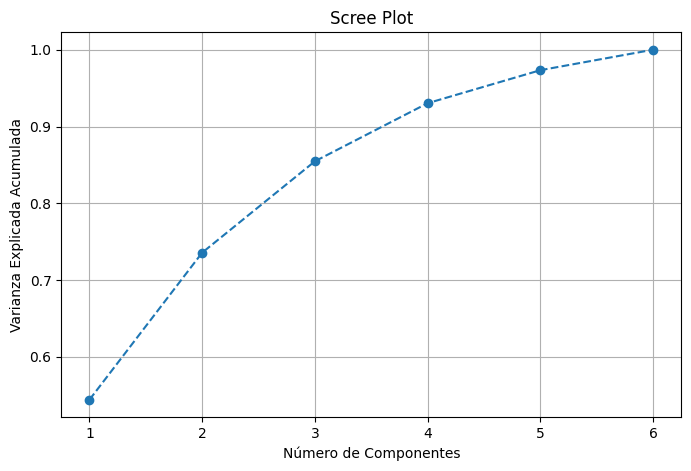

In [ ]:
#@title **code** 2. Aplicar PCA y Analizar la Varianza Explicada
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Aplicamos PCA sin especificar el n√∫mero de componentes:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#Calculamos la varianza explicada acumulada:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

#Graficamos el Scree Plot:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('N√∫mero de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

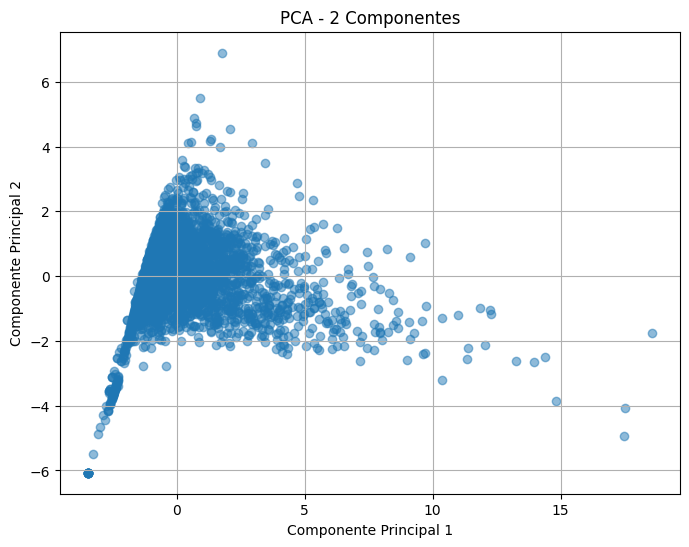

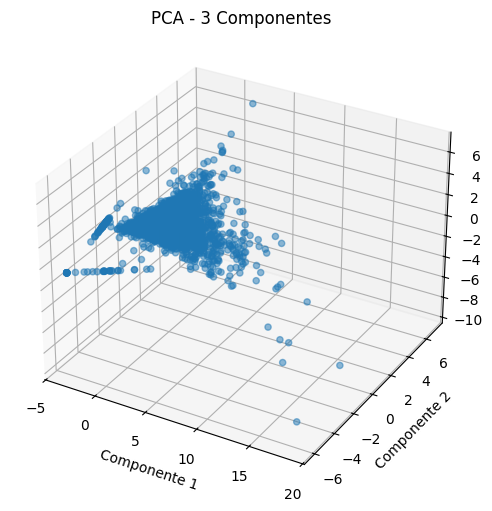

In [ ]:
#@title **code** 3. Reducir Dimensionalidad y Visualizar Componentes Principales

#PCA con 2 componentes:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

#Lo visualizamos en 2D:
plt.figure(figsize=(8,6))
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - 2 Componentes')
plt.grid(True)
plt.show()

#PCA con 3 componentes:
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

#Y ahora los visualizamos en 3D:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2], alpha=0.5)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
ax.set_title('PCA - 3 Componentes')
plt.show()

In [ ]:
#@title **code** 4. Reconstrucci√≥n de Datos y C√°lculo del Error
from sklearn.metrics import mean_squared_error

#Hacemos la reconstrucci√≥n con 2 componentes:
X_reconstructed_2 = pca_2.inverse_transform(X_pca_2)
mse_2 = mean_squared_error(X_scaled, X_reconstructed_2)
print(f'Error cuadr√°tico medio con 2 componentes: {mse_2:.4f}')

#Luego la hacemos con 3 componentes:
X_reconstructed_3 = pca_3.inverse_transform(X_pca_3)
mse_3 = mean_squared_error(X_scaled, X_reconstructed_3)
print(f'Error cuadr√°tico medio con 3 componentes: {mse_3:.4f}')

Error cuadr√°tico medio con 2 componentes: 0.2643
Error cuadr√°tico medio con 3 componentes: 0.1453


In [ ]:
#@title **code** 5. Interpretaci√≥n de Componentes Principales

#Componentes principales:
components = pd.DataFrame(pca_3.components_, columns=numerical_features, index=['PC1', 'PC2', 'PC3'])
print(components)

       budget  popularity   runtime  vote_average  vote_count   revenue
PC1  0.430462    0.459503  0.248867      0.226347    0.500644  0.489640
PC2 -0.254804   -0.099334  0.610996      0.702943   -0.095626 -0.220496
PC3  0.408388   -0.336145  0.659773     -0.481321   -0.220273  0.068810


In [ ]:
pd.read_csv('tmdb_5000_movies.csv')


budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.go.com/disneypictures/pirates/     285   
2           http://www.sonypictures.com/movies/spectre/  206647   
3                    http://www.thedarkknightrises.com/   49026   
4                  http://movies.disney.com/john-carter   49529   
...                                                 ...     ...   
4798                                                NaN    9367   
4799                                                NaN   72766   
4800  http://www.hallmarkchannel.com/signedsealeddel...  231617   
4801                        http://shanghaicalling.com/  126186   
4802                                                NaN   25975   

                                               keywords original_language  \
0     [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1     [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2     [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3     [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4     [{"id": 818, "name": "based on novel"}, {"id":...                en   
...                                                 ...               ...   
4798  [{"id": 5616, "name": "united states\u2013mexi...                es   
4799                                                 []                en   
4800  [{"id": 248, "name": "date"}, {"id": 699, "nam...                en   
4801                                                 []                en   
4802  [{"id": 1523, "name": "obsession"}, {"id": 224...                en   

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4798                               El Mariachi   
4799                                 Newlyweds   
4800                 Signed, Sealed, Delivered   
4801                          Shanghai Calling   
4802                         My Date with Drew   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond‚Äôs past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4798  El Mariachi just wants to play his guitar and ...   14.269792   
4799  A newlywed couple's honeymoon is upended by th...    0.642552   
4800  "Signed, Sealed, Delivered" introduces a dedic...    1.444476   
4801  When ambitious New York attorney Sam is sent t...    0.857008   
4802  Ever since the second grade when he first saw ..

In [ ]:
#@title **Paso 1:** Cargar y Preprocesar el Dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Cargamos el dataset:
df = pd.read_csv('tmdb_5000_movies.csv')

#Seleccionamos las caracter√≠sticas relevantes:
features = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']
cols_to_check_for_nan = features + ['revenue', 'budget']
df.dropna(subset=cols_to_check_for_nan, inplace=True)

X = df[features]
y = (df['revenue'] > df['budget']).astype(int)

#Dividimos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Estandarizamos las caracter√≠sticas:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#@title  **Paso 2:** Aplicar PCA para Reducci√≥n de Dimensionalidad
from sklearn.decomposition import PCA

#Aplicamos PCA para preservar el 95% de la varianza:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#Muestro la cantidad de componentes seleccionados:
print(f'N√∫mero de componentes seleccionados: {pca.n_components_}')

N√∫mero de componentes seleccionados: 4


In [ ]:
#@title  **Paso 3:** Entrenar Modelos de Clasificaci√≥n: **1. Regresi√≥n log√≠stica**
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#Entrenamos el modelo con datos reducidos por PCA:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_pca, y_train)

#Hacemos las predicts:
y_pred_log_reg = log_reg.predict(X_test_pca)

#Evaluamos el modelo:
print("Regresi√≥n Log√≠stica con PCA")
print(f'Precisi√≥n: {accuracy_score(y_test, y_pred_log_reg):.4f}')
print(classification_report(y_test, y_pred_log_reg))

Regresi√≥n Log√≠stica con PCA
Precisi√≥n: 0.7700
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       444
           1       0.84      0.70      0.77       517

    accuracy                           0.77       961
   macro avg       0.78      0.78      0.77       961
weighted avg       0.78      0.77      0.77       961



In [ ]:
#@title **2. Random Forest Classifier**
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo con datos reducidos por PCA
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_pca, y_train)

# Realizar predicciones
y_pred_rf = rf_clf.predict(X_test_pca)

# Evaluar el modelo
print("Bosques Aleatorios con PCA")
print(f'Precisi√≥n: {accuracy_score(y_test, y_pred_rf):.4f}')
print(classification_report(y_test, y_pred_rf))

Bosques Aleatorios con PCA
Precisi√≥n: 0.7586
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       444
           1       0.79      0.76      0.77       517

    accuracy                           0.76       961
   macro avg       0.76      0.76      0.76       961
weighted avg       0.76      0.76      0.76       961



In [ ]:
#@title **Paso 4:** Comparar con Modelos sin PCA: **1. Regresi√≥n Log√≠stica sin PCA**
#Entrenamos el modelo sin PCA:
log_reg_no_pca = LogisticRegression(random_state=42)
log_reg_no_pca.fit(X_train_scaled, y_train)

#Hacemos las predicts:
y_pred_log_reg_no_pca = log_reg_no_pca.predict(X_test_scaled)

#Evaluamos el modelo:
print("Regresi√≥n Log√≠stica sin PCA")
print(f'Precisi√≥n: {accuracy_score(y_test, y_pred_log_reg_no_pca):.4f}')
print(classification_report(y_test, y_pred_log_reg_no_pca))

Regresi√≥n Log√≠stica sin PCA
Precisi√≥n: 0.7742
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       444
           1       0.86      0.70      0.77       517

    accuracy                           0.77       961
   macro avg       0.78      0.78      0.77       961
weighted avg       0.79      0.77      0.77       961



In [ ]:
#@title **2. Random Forests sin PCA**
#Entrenamos el modelo sin PCA:
rf_clf_no_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_no_pca.fit(X_train_scaled, y_train)

#Hacemos las predicts:
y_pred_rf_no_pca = rf_clf_no_pca.predict(X_test_scaled)

#Evaluamos el modelo:
print("Bosques Aleatorios sin PCA")
print(f'Precisi√≥n: {accuracy_score(y_test, y_pred_rf_no_pca):.4f}')
print(classification_report(y_test, y_pred_rf_no_pca))

Bosques Aleatorios sin PCA
Precisi√≥n: 0.7773
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       444
           1       0.81      0.77      0.79       517

    accuracy                           0.78       961
   macro avg       0.78      0.78      0.78       961
weighted avg       0.78      0.78      0.78       961



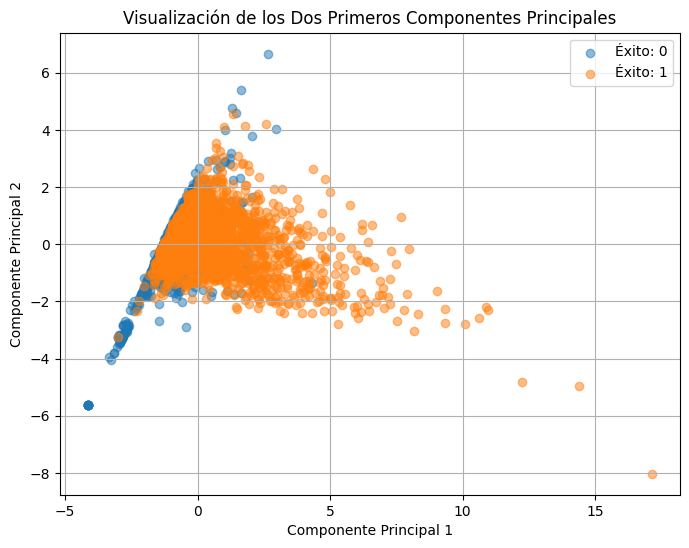

In [ ]:
#@title **Paso 5:** Visualizar Componentes Principales
import matplotlib.pyplot as plt

#Creamos un DataFrame con los dos primeros componentes:
pca_df = pd.DataFrame(X_train_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['√âxito Financiero'] = y_train.values

#Graficamos:
plt.figure(figsize=(8,6))
for label in pca_df['√âxito Financiero'].unique():
    subset = pca_df[pca_df['√âxito Financiero'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'√âxito: {label}', alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualizaci√≥n de los Dos Primeros Componentes Principales')
plt.legend()
plt.grid(True)
plt.show()